NAME: **SULEGAMA JHANSI**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**


#6.MLR

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df = pd.read_csv('ToyotaCorolla - MLR.csv', encoding='latin1')

In [31]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Checking column names to avoid KeyError
print("\nColumn Names in Dataset:")
print(df.columns)

Dataset Preview:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Column Names in Dataset:
Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [32]:
# Renaming columns to standard names if needed (update based on actual dataset)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]  # Remove spaces and standardize

# Checking for missing values
df = df.dropna()  # Drop rows with missing values if any

# Selecting relevant features dynamically
expected_columns = ['Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Quarterly_Tax', 'Price']
existing_columns = [col for col in expected_columns if col in df.columns]

df = df[existing_columns]


In [33]:
# Convert categorical variable 'FuelType' into numerical values if it exists
if 'FuelType' in df.columns:
    df = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

# Defining features and target variable
X = df.drop(columns=['Price']) if 'Price' in df.columns else df
y = df['Price'] if 'Price' in df.columns else None


Multiple Linear Regression Performance:
MSE: 5214334.272111793
R2 Score: 0.6092020691331612

Ridge Regression Performance:
MSE: 5211897.491354685
R2 Score: 0.6093846981761336

Lasso Regression Performance:
MSE: 5214207.978415868
R2 Score: 0.609211534447902


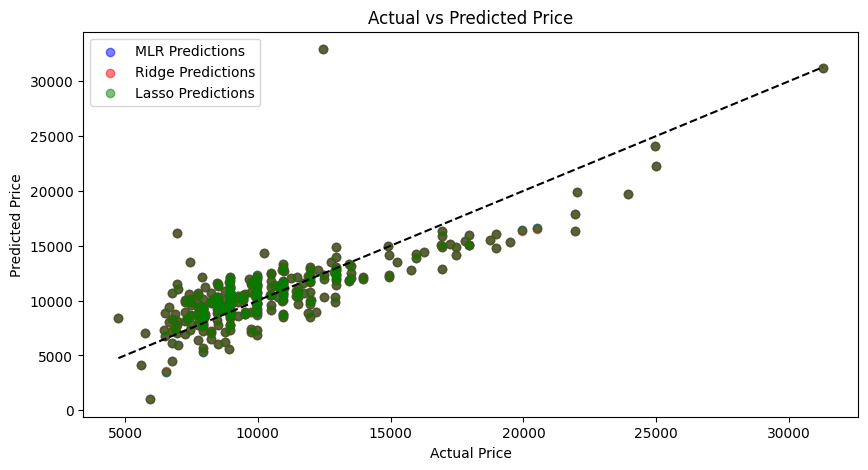

In [34]:
# Ensure target variable exists before proceeding
if y is not None:
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Building Multiple Linear Regression Model
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)

    # Evaluating the model
    print("\nMultiple Linear Regression Performance:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

    # Applying Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_scaled, y_train)
    y_ridge_pred = ridge.predict(X_test_scaled)

    print("\nRidge Regression Performance:")
    print("MSE:", mean_squared_error(y_test, y_ridge_pred))
    print("R2 Score:", r2_score(y_test, y_ridge_pred))

    # Applying Lasso Regression
    lasso = Lasso(alpha=0.1)  # Reduced alpha for better feature selection
    lasso.fit(X_train_scaled, y_train)
    y_lasso_pred = lasso.predict(X_test_scaled)

    print("\nLasso Regression Performance:")
    print("MSE:", mean_squared_error(y_test, y_lasso_pred))
    print("R2 Score:", r2_score(y_test, y_lasso_pred))

    # Visualization of actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='MLR Predictions')
    plt.scatter(y_test, y_ridge_pred, color='red', alpha=0.5, label='Ridge Predictions')
    plt.scatter(y_test, y_lasso_pred, color='green', alpha=0.5, label='Lasso Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.legend()
    plt.show()
else:
    print("Error: 'Price' column is missing. Check dataset structure.")